In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Read the dataset

In [2]:
from pandas import read_csv
A =read_csv("C:/Users/Sourabh/Downloads/50_Startups.csv")

In [3]:
A.head(2)

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


# Exploratory Data Analysis

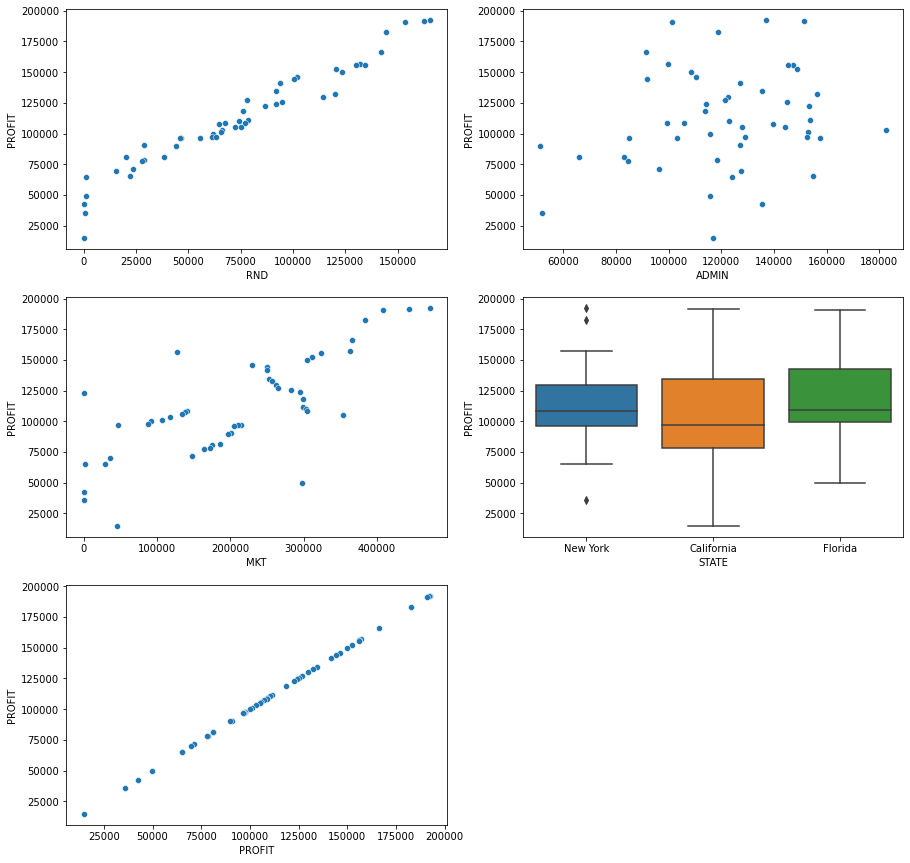

In [4]:
from seaborn import boxplot,scatterplot
from matplotlib.pyplot import plot,subplot,figure
m = 1
figure(figsize=(15,15))
for i in A.columns:
    if(A[i].dtypes == "object"):
        subplot(3,2,m)
        boxplot(A[i],A.PROFIT)
        m = m + 1
    else:
        subplot(3,2,m)
        scatterplot(A[i],A.PROFIT)
        m = m + 1

In [5]:
A.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# Define X and Y

In [6]:
X = A[["RND"]]
Y = A[["PROFIT"]]

# Divide the data in traini g and testing set

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

# Create a Regression model

In [8]:
from sklearn.linear_model import LinearRegression
lm  = LinearRegression()

# Training the regression model on training set

In [9]:
model = lm.fit(xtrain,ytrain)

# Find b0 | b1 to get regression results

In [10]:
model.intercept_[0]

50959.93512107824

In [11]:
model.coef_[0][0]

0.8347393888782882

In [12]:
b0 = model.intercept_[0]

In [13]:
b1 = model.coef_[0][0]

# Create predictions on test data 
1. Manual method
2. Predict() method

# Manual Method

In [14]:
results = xtest

In [15]:
results ["Y_intercept"]= b0
results["Slope"]=b1
results["Pred_profit"]=b0+b1*results.RND
results["Actual_PROFIT"]=ytest

In [16]:
results

,RND,Y_intercept,Slope,Pred_profit,Actual_PROFIT
28,66051.52,50959.935121,0.834739,106095.740560,103282.38
20,76253.86,50959.935121,0.834739,114612.035617,118474.03
2,153441.51,50959.935121,0.834739,179043.607407,191050.39
48,542.05,50959.935121,0.834739,51412.405607,35673.41
44,22177.74,50959.935121,0.834739,69472.568255,65200.33
4,142107.34,50959.935121,0.834739,169582.529268,166187.94
9,123334.88,50959.935121,0.834739,153912.417480,149759.96
32,63408.86,50959.935121,0.834739,103889.808167,97427.84
23,67532.53,50959.935121,0.834739,107331.997943,108733.99
29,65605.48,50959.935121,0.834739,105723.413403,101004.64


# predict() method

In [17]:
xtest = xtest[["RND"]]

In [18]:
pred = model.predict(xtest)

In [19]:
xtest["predicted_profit"]=pred
xtest["Actual_profit"]=ytest

In [20]:
xtest

,RND,predicted_profit,Actual_profit
28,66051.52,106095.740560,103282.38
20,76253.86,114612.035617,118474.03
2,153441.51,179043.607407,191050.39
48,542.05,51412.405607,35673.41
44,22177.74,69472.568255,65200.33
4,142107.34,169582.529268,166187.94
9,123334.88,153912.417480,149759.96
32,63408.86,103889.808167,97427.84
23,67532.53,107331.997943,108733.99
29,65605.48,105723.413403,101004.64


# Find error | loss 

# testing Error

In [21]:
from  sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

5882.315177349297

# plot results of regression
1. seaborn
2. Matplotlib

<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

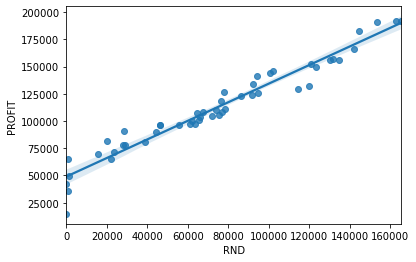

In [22]:
from seaborn import regplot
regplot(X.RND,Y.PROFIT)

Text(0.5, 1.0, 'Regression line between RND and PROFIT')

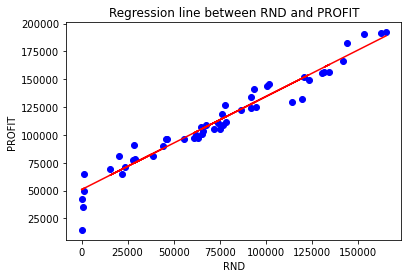

In [23]:
from matplotlib.pyplot import plot,scatter,xlabel,ylabel,title
scatter(X.RND,Y.PROFIT,c="blue")
plot(X.RND,b0+b1*X.RND,c="red")
xlabel("RND")
ylabel("PROFIT")
title("Regression line between RND and PROFIT")

# Multiple Linear Regression 

In [24]:
X = A[["RND","MKT"]]
Y = A[["PROFIT"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
from sklearn.metrics import mean_absolute_error
pred = model.predict(xtest)
round(mean_absolute_error(ytest,pred),2)

5916.05

In [25]:
X = A[["RND","MKT","ADMIN"]]
Y = A[["PROFIT"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
from sklearn.metrics import mean_absolute_error
pred = model.predict(xtest)
round(mean_absolute_error(ytest,pred),2)

5912.41

# Include Categorical predictors into continous
1. one Hot Encoding
2. Label Encoding

In [26]:
from pandas import get_dummies
get_dummies(A.STATE).join(A.STATE)

,California,Florida,New York,STATE
0,0,0,1,New York
1,1,0,0,California
2,0,1,0,Florida
3,0,0,1,New York
4,0,1,0,Florida
5,0,0,1,New York
6,1,0,0,California
7,0,1,0,Florida
8,0,0,1,New York
9,1,0,0,California


In [27]:
X = A[["RND","MKT","ADMIN"]].join(get_dummies(A.STATE))
Y = A[["PROFIT"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
from sklearn.metrics import mean_absolute_error
pred = model.predict(xtest)
round(mean_absolute_error(ytest,pred),2)

6034.2

In [28]:
X.shape

(50, 6)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
W = le.fit_transform(A.STATE)

In [30]:
W

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [31]:
B = A[["STATE"]]
B["New_STATE"]=W

In [32]:
B

,STATE,New_STATE
0,New York,2
1,California,0
2,Florida,1
3,New York,2
4,Florida,1
5,New York,2
6,California,0
7,Florida,1
8,New York,2
9,California,0


In [33]:
X = A[["RND","MKT","ADMIN"]]
X["New_STATE"]=W
Y = A[["PROFIT"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
from sklearn.metrics import mean_absolute_error
pred = model.predict(xtest)
round(mean_absolute_error(ytest,pred),2)

5911.16

In [34]:
X

,RND,MKT,ADMIN,New_STATE
0,165349.20,471784.10,136897.80,2
1,162597.70,443898.53,151377.59,0
2,153441.51,407934.54,101145.55,1
3,144372.41,383199.62,118671.85,2
4,142107.34,366168.42,91391.77,1
5,131876.90,362861.36,99814.71,2
6,134615.46,127716.82,147198.87,0
7,130298.13,323876.68,145530.06,1
8,120542.52,311613.29,148718.95,2
9,123334.88,304981.62,108679.17,0


In [35]:
X = A[["STATE"]]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(X)

LabelEncoder()

In [36]:
le.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [37]:
le.fit_transform(X)

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

# Ridge and Lasso

In [38]:
Y = A[["PROFIT"]]
X = A[["RND","MKT"]]

In [39]:
X.skew()

RND    0.164002
MKT   -0.046472
dtype: float64

In [40]:
Y.skew()

PROFIT    0.023291
dtype: float64

In [41]:
A.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

In [43]:
from sklearn.linear_model import Ridge
rr = Ridge()

tuning_grid = {"alpha":[0.99,0.98,0.97,0.96,1.01,1.02,1.03]}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rr,tuning_grid,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.03}

In [44]:
rr = Ridge(alpha=1.03)
model = rr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

In [45]:
from sklearn.metrics import mean_absolute_error
m2 = mean_absolute_error(ytrain,pred_tr)
m2

6778.3634503792155

In [46]:
from sklearn.metrics import mean_absolute_error
m1 = mean_absolute_error(ytest,pred_ts)
m1

5837.753638999771

# Simple Tree

In [47]:
Y = A[["PROFIT"]]
X = A[["RND","MKT"]]

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21)
model = dtr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
print("Training Error: ",round(tr_err,2))
print("Testing Error: ",round(ts_err,2))

Training Error:  0.0
Testing Error:  154045307.1


# pruned_tree based on max depth

In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=3)
model = dtr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
print("Training Error: ",round(tr_err,2))
print("Testing Error: ",round(ts_err,2))

Training Error:  55005419.44
Testing Error:  173855022.53


In [50]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor(random_state=21)
tg = {"max_depth":range(1,20,1)}
cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=3)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 7}

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=7)
model = dtr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
print("Training Error: ",round(tr_err,2))
print("Testing Error: ",round(ts_err,2))

Training Error:  0.0
Testing Error:  154045307.1


# pruned tree based on min samples at leaf

In [52]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor(random_state=21)
tg = {"min_samples_leaf":range(1,20,1)}
cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=3)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 2}

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_leaf=2)
model = dtr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
print("Training Error: ",round(tr_err,2))
print("Testing Error: ",round(ts_err,2))

Training Error:  21599574.26
Testing Error:  183533581.04


# pruned tree based on min samples used for splitting

In [54]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor(random_state=21)
tg = {"min_samples_split":range(1,20,1)}
cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=3)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 6}

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,min_samples_split=6)
model = dtr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
print("Training Error: ",round(tr_err,2))
print("Testing Error: ",round(ts_err,2))

Training Error:  45815721.78
Testing Error:  192322521.92


In [56]:
def model_builder(df,Ycol,cols_to_drop,model_obj):
    import pandas as pd
    df = df.drop(labels=cols_to_drop,axis =1)
    from PM8 import replacer
    replacer(df)
    Y = df[Ycol]
    X = df.drop(labels=Ycol,axis=1)
    from PM8 import preprocessing
    X_new = preprocessing(X)
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(X_new,Y,test_size=0.2,random_state=31)
    from PM8 import find_overfit_con,find_overfit_cat
    if(ytrain[Ycol[0]].dtypes == "object"):
        find_overfit_cat(model_obj,xtrain,xtest,ytrain,ytest)
    else:
        find_overfit_con(model_obj,xtrain,xtest,ytrain,ytest)

In [57]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=4)
model_builder(A,["PROFIT"],["RND","MKT"],knr)

training error:  29169.826687499997
testing error:  29542.14475


In [58]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5)
model_builder(A,["PROFIT"],["RND","MKT"],knr)

training error:  29717.06285
testing error:  33399.362400000005


In [59]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
model_builder(A,["PROFIT"],["RND","MKT"],knr)

training error:  27869.578749999997
testing error:  32252.17266666667


In [60]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=21,max_depth=2)
abr = AdaBoostRegressor(dtr,random_state=21,n_estimators=40)
model_builder(A,["PROFIT"],["RND","MKT"],abr)

training error:  23537.04974845275
testing error:  39861.83387795031


In [61]:
def CV_tune(df,Ycol,cols_to_drop,model_obj,tp):
    import pandas as pd
    df = df.drop(labels=cols_to_drop,axis =1)
    from PM8 import replacer
    replacer(df)
    Y = df[Ycol]
    X = df.drop(labels=Ycol,axis=1)
    from PM8 import preprocessing
    X_new = preprocessing(X)
    from sklearn.model_selection import train_test_split
    xtrain,xtest,ytrain,ytest=train_test_split(X_new,Y,test_size=0.2,random_state=31)
    if(ytrain[Ycol[0]].dtypes == "object"):
        from sklearn.model_selection import GridSearchCV
        cv = GridSearchCV(model_obj,tp,scoring="accuracy",cv=4)
        cvmodel = cv.fit(xtrain,ytrain)
        print(cvmodel.best_params_)
    else:
        from sklearn.model_selection import GridSearchCV
        cv = GridSearchCV(model_obj,tp,scoring="neg_mean_absolute_error",cv=4)
        cvmodel = cv.fit(xtrain,ytrain)
        print(cvmodel.best_params_)

In [62]:
knr = KNeighborsRegressor()
tp = {"n_neighbors":range(2,40,1)}
CV_tune(A,["PROFIT"],["RND","MKT"],knr,tp)

{'n_neighbors': 19}


In [63]:
dtr = DecisionTreeRegressor(random_state=21,max_depth=2)
abr = AdaBoostRegressor(dtr,random_state=21)
tp = {"n_estimators":range(2,40,1)}
CV_tune(A,["PROFIT"],["RND","MKT"],abr,tp)

{'n_estimators': 19}
